In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat

In [2]:
datafile = '../../dataset/ch04/car_speeds.txt'
car_speeds = pd.read_csv(datafile, sep='\t')

In [3]:
car_speeds.head()

,direction,speed
0,Up,22.77
1,Up,28.19
2,Down,20.96
3,Down,19.97
4,Up,30.12


In [4]:
len(car_speeds)

500

In [5]:
up_speeds = car_speeds[car_speeds.direction=='Up']['speed']
dn_speeds = car_speeds[car_speeds.direction=='Down']['speed']

[Text(0.5, 0, 'Down')]

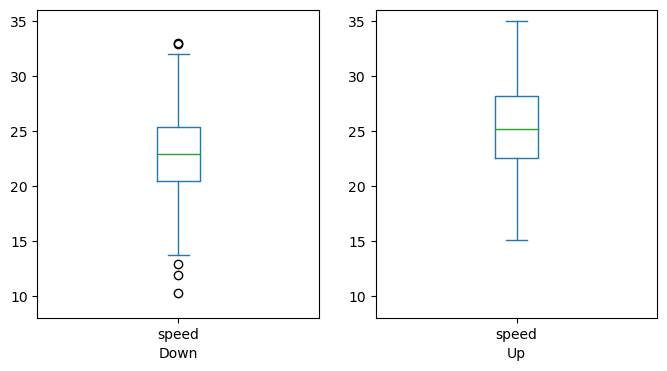

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))
p = up_speeds.plot(kind='box', ax=axes[1])
p.set(ylim=[8, 36])
p.set(xlabel='Up')
p = dn_speeds.plot(kind='box', ax=axes[0])
p.set(ylim=[8, 36])
p.set(xlabel='Down')

In [7]:
dn_q75, dn_q25 = np.percentile(dn_speeds, [75, 25])
up_q75, up_q25 = np.percentile(up_speeds, [75, 25])

summary_speeds_directions = pd.DataFrame(
    data={
        'Min':    [round(min(dn_speeds), 1),
                   round(min(up_speeds), 1)],
        'Q1':     [round(dn_q25, 1),
                   round(up_q25, 1)],
        'Median': [round(stat.median(dn_speeds), 1),
                   round(stat.median(up_speeds), 1)],
        'Q3':     [round(dn_q75, 1),
                   round(up_q75, 1)],
        'Max':    [round(max(dn_speeds), 1),
                   round(max(up_speeds), 1)],
        'IQR':    [round(dn_q75 - dn_q25, 1),
                   round(up_q75 - up_q25, 1)]
    },
    index=['Down', 'Up']
)

summary_speeds_directions

,Min,Q1,Median,Q3,Max,IQR
Down,10.3,20.5,22.9,25.4,33.0,4.9
Up,15.1,22.5,25.2,28.2,35.0,5.7


In [8]:
print(f"Mean speeds going down: {stat.mean(dn_speeds)} \n")
print(f"Mean speeds going up: {stat.mean(up_speeds)} \n")
print(f"There is a difference: {stat.mean(up_speeds) - stat.mean(dn_speeds):.2f} (up is faster)")

Mean speeds going down: 22.71708 

Mean speeds going up: 25.25172 

There is a difference: 2.53 (up is faster)


In [9]:
print(f'{dn_speeds.count()} samples going down')
print(f'{up_speeds.count()} samples going up')

250 samples going down
250 samples going up


In [10]:
car_speeds.isna().any()  #  NO missing data !!

direction    False
speed        False
dtype: bool

### Simulation: 
We have seen different median and mean speeds between going up and down.  We may reach a conclusion that cars going up drive faster than cars going down.  However, one may argue that such differences are due to randomness.

To test whether the argument is reasonable, we **assume** that it is **true that the differences are merely due to randomness"**.  What the assumption implies is that, if we randomly shuffle the speeds into "up" and "down", we expect to see a difference in their speeds which is on par with what we have see in real data.  (Think about this logic and tell yourself if you believe this kind of reasoning makes sense.)

Our test may reach one of two opposite conclusions:
1. we may find that the assumption leads to a rare event, which is rare enough that its probability of occurence is below a threshold (usually 5% for beginners).  Then we may conclude that the assumption is rejected!
2. OR, we find that the assumption is reasonable in that it leads to an event with moderate probability over the set threshold.  In this case, we can only retain the assuption.  We cannot prove it true, but we cannot overturn it either.  We may design new experiments and run more test to collect more data to see if we can eventually reject it.

In [11]:
# a helper function, for flipping a fair coin with two sides 0 and 1
def flip_coin():
    return np.random.randint(2)

Simulation of 500 samples takes 2.04 sec

0 samples having differencegreather than the observed mean difference

Therefore, the observed difference is by no means due to randomness


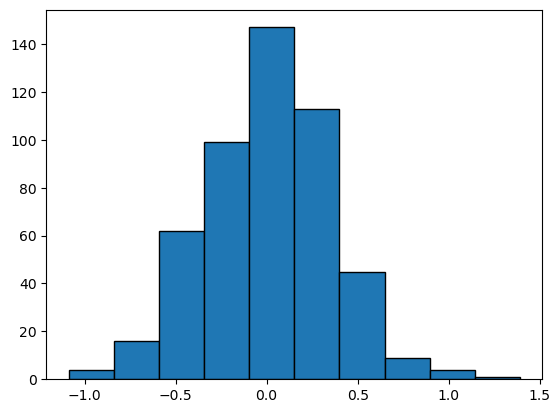

In [27]:
from time import time
observed_mean_diff = stat.mean(up_speeds) - stat.mean(dn_speeds)
speed_pool = car_speeds.speed  # extract all the speed numbers
sample_size = 500
samples = np.zeros(sample_size)
# randomly assign each speed to an 'up' group or a 'down' group
ups = np.zeros(250)
dns = np.zeros(250)
start_time = time()
for i in range(sample_size):  # sampling 10,000 times
    up_ind = 0
    dn_ind = 0
    for j in range(500):  # 500 speeds to be assigned
        if flip_coin():  # if we get a 1 here, we try to put it in 'up'
            if up_ind < 250:  # 'up' can accept new data
                ups[up_ind] = speed_pool[j]
                up_ind += 1
            else:  # 'up' cannot accept new data, we have to put it in 'down'
                dns[dn_ind] = speed_pool[j]
                dn_ind += 1
        else:  # we got a 0 drawn, we try to put it in 'down'
            if dn_ind < 250:
                dns[dn_ind] = speed_pool[j]
                dn_ind += 1
            else:
                ups[up_ind] = speed_pool[j]
                up_ind += 1
    # stat the difference in the means of two simulated groups, and pool the data into our sample
    samples[i] = stat.mean(ups) - stat.mean(dns)

duration = time() - start_time
print(f'Simulation of {sample_size} samples takes {duration:.2f} sec\n')
    
# plot hist of sample, and calc the likelihood of observing a difference no smaller than the 'observed_mean_diff ~ 2.53'
plt.hist(samples, edgecolor='k');

print(f'{sum(samples[samples>observed_mean_diff])} samples having difference'
       'greather than the observed mean difference\n')
print(f'Therefore, the observed difference is by no means due to randomness')
